# Gym Environment

In [3]:
%pip install -U "gym==0.26.2" # -U flag stands for Upgrade
import numpy as np
import gym
import random

In [4]:
from gym import envs
print('\n'.join([str(env) for env in envs.registry]))

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
Reacher-v2
Reacher-v4
Pusher-v2
Pusher-v4
InvertedPendulum-v2
InvertedPendulum-v4
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
Hopper-v2
Hopper-v3
Hopper-v4
Swimmer-v2
Swimmer-v3
Swimmer-v4
Walker2d-v2
Walker2d-v3
Walker2d-v4
Ant-v2
Ant-v3
Ant-v4
Humanoid-v2
Humanoid-v3
Humanoid-v4
HumanoidStandup-v2
HumanoidStandup-v4


In [5]:
#@ creating an environment for chosen games:
env=gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')
env.reset()

(0, {'prob': 1})

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
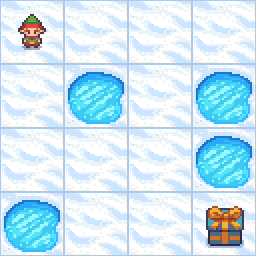

In [6]:
#@ inspection
env.render()

In [7]:
#@ Printing the size of the number of states in the game:
print('Number of states:', env.observation_space.n)
print('Number of possible action:', env.action_space.n)

Number of states: 16
Number of possible action: 4


In [8]:
env.action_space.sample()

3

In [9]:
env.reset()

(0, {'prob': 1})

In [11]:
env.step(env.action_space.sample())

(5, 0.0, True, False, {'prob': 1.0})

# Building Q-table

In [12]:
%pip install torch-snippets "gym==0.26.2"
import numpy as np
import gym
import random

In [13]:
#@ Initialization Q-Table with zeros:

action_size=env.action_space.n
state_size=env.observation_space.n
qtable=np.zeros((state_size, action_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
episode_rewards=[]
for i in range(10000):
  state, *_=env.reset()

  total_rewards=0
  for step in range(50):
    action=env.action_space.sample()
    new_state, reward, done, *_=env.step(action)

    #updating qtable
    qtable[state, action]+=0.1*(reward+0.9*np.max(qtable[new_state, :])- qtable[state, action])

    state=new_state
    total_rewards+=reward

  episode_rewards.append(total_rewards)
print(qtable)

# Leveraging Exploration-Explotation

In [16]:
episode_rewards=[]
epsilon=1
max_epsilon=1
min_epsilon=0.01
decay_rate=0.005
for episode in range(1000):
  state, *_=env.reset()
  total_rewards=0
  for step in range(50):
    exp_exp_tradeoff=random.uniform(0, 1)

    # Exploitation:
    if exp_exp_tradeoff>epsilon:
      action=np.argmax(qtable[state, :])
    else:
      # Exploration:
      action=env.action_space.sample()

    new_state, reward, done, *_=env.step(action)
    qtable[state, action]+=0.9*(reward + 0.9*np.max(qtable[new_state, :])-qtable[state, action])

    state=new_state
    total_rewards+=reward
  episode_rewards.append(total_rewards)
  epsilon=min_epsilon+(max_epsilon-min_epsilon)*np.exp(-decay_rate*episode) #Corrected the exponential decay formula
print(qtable)

[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.         0.43046721]
 [0.43046721 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.72171    0.9        0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


-------------------
Episode 0
1
1
2
1
2
2
Number of steps: 6


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
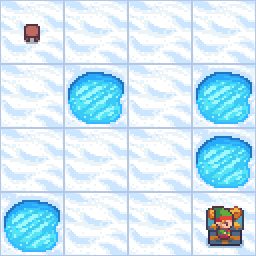

In [21]:
env.reset()
for episode in range(1):
  state, *_ = env.reset()
  step = 0
  done = False
  print("-------------------")
  print("Episode", episode)
  for step in range(50):
    env.render()
    action = np.argmax(qtable[state, :])
    print(action)
    new_state, reward, done, *_ = env.step(action)
    if done:
      print('Number of steps:', step +1)
      break
    state = new_state
env.render()

